In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = sns.load_dataset("tips")


print(df.info())
print(df.describe(include="all"))


print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
        total_bill         tip   sex smoker  day    time        size
count   244.000000  244.000000   244    244  244     244  244.000000
unique         NaN         NaN     2      2    4       2         NaN
top            NaN         NaN  Male     No  Sat  Dinner         NaN
freq           NaN         NaN   157    151   87     176         NaN
mean     19.785943    2.998279   NaN    NaN  NaN     NaN    2.569672
std       8.902412    1.383638   NaN

In [3]:
group_avg = df.groupby(["day", "sex"])[["total_bill", "tip"]].agg("mean")
print(group_avg)

             total_bill       tip
day  sex                         
Thur Male     18.714667  2.980333
     Female   16.715312  2.575625
Fri  Male     19.857000  2.693000
     Female   14.145556  2.781111
Sat  Male     20.802542  3.083898
     Female   19.680357  2.801786
Sun  Male     21.887241  3.220345
     Female   19.872222  3.367222


/tmp/ipython-input-1944466333.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_avg = df.groupby(["day", "sex"])[["total_bill", "tip"]].agg("mean")


In [4]:
df["tip_rate"] = df["tip"] / df["total_bill"]

tip_rate_avg = df.groupby(["day", "time"])["tip_rate"].mean()
print(tip_rate_avg)

day   time  
Thur  Lunch     0.161301
      Dinner    0.159744
Fri   Lunch     0.188765
      Dinner    0.158916
Sat   Lunch          NaN
      Dinner    0.153152
Sun   Lunch          NaN
      Dinner    0.166897
Name: tip_rate, dtype: float64


/tmp/ipython-input-3361389282.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_rate_avg = df.groupby(["day", "time"])["tip_rate"].mean()


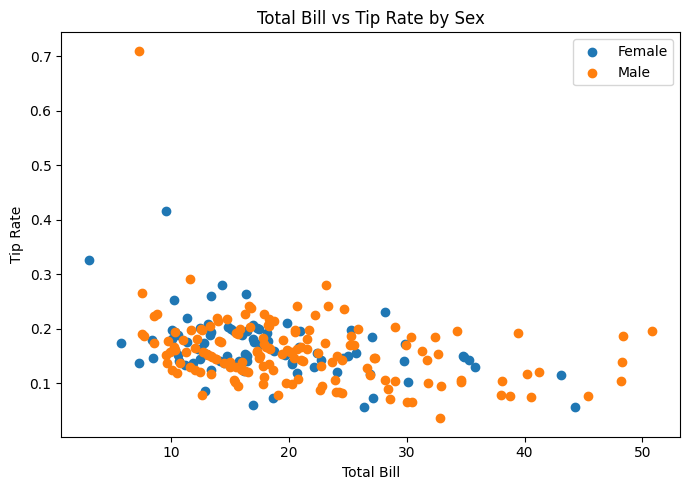

In [5]:
plt.figure(figsize=(7,5))

for sex in df["sex"].unique():
    subset = df[df["sex"] == sex]
    plt.scatter(subset["total_bill"], subset["tip_rate"], label=sex)

plt.xlabel("Total Bill")
plt.ylabel("Tip Rate")
plt.title("Total Bill vs Tip Rate by Sex")
plt.legend()
plt.tight_layout()
plt.show()